In [40]:
import pandas as pd
from dataprep.eda import plot, plot_correlation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
d_items = pd.read_csv('mimic/D_ITEMS.csv')
d_labitems = pd.read_csv('mimic/D_LABITEMS.csv')

In [3]:
d_labitems[(d_labitems['ITEMID']==50816)|(d_labitems['ITEMID']==51300)|(d_labitems['ITEMID']==51301)|
          (d_labitems['ITEMID']==950842)|(d_labitems['ITEMID']==50983)|(d_labitems['ITEMID']==50822)|
          (d_labitems['ITEMID']==50971)|(d_labitems['ITEMID']==50821)]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
143,17,50816,Oxygen,Blood,Blood Gas,19994-3
148,22,50821,pO2,Blood,Blood Gas,11556-8
149,23,50822,"Potassium, Whole Blood",Blood,Blood Gas,6298-4
298,172,50971,Potassium,Blood,Chemistry,2823-3
310,184,50983,Sodium,Blood,Chemistry,2951-2
626,500,51300,WBC Count,Blood,Hematology,26464-8
627,501,51301,White Blood Cells,Blood,Hematology,804-5


In [5]:
d_items[(d_items['ITEMID']==223761)|(d_items['ITEMID']==220739)|(d_items['ITEMID']==220045)|
       (d_items['ITEMID']==220050)|(d_items['ITEMID']==220179)|(d_items['ITEMID']==223835)|
       (d_items['ITEMID']==51)|(d_items['ITEMID']==211)|(d_items['ITEMID']==50816)]

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
320,57,51,Arterial BP [Systolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
475,212,211,Heart Rate,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
11494,12708,220739,GCS - Eye Opening,Eye Opening,metavision,chartevents,Neurological,NaN,Text,NaN
11498,12712,220045,Heart Rate,HR,metavision,chartevents,Routine Vital Signs,bpm,Numeric,NaN
11502,12716,220050,Arterial Blood Pressure systolic,ABPs,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
11520,12734,220179,Non Invasive Blood Pressure systolic,NBPs,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,NaN
12366,12757,223761,Temperature Fahrenheit,Temperature F,metavision,chartevents,Routine Vital Signs,?F,Numeric,NaN
12413,12804,223835,Inspired O2 Fraction,FiO2,metavision,chartevents,Respiratory,None,Numeric,NaN


In [33]:
admission = pd.read_csv("mimic/ADMISSIONS.csv")
icu = pd.read_csv('mimic/ICUSTAYS.csv')
heart_rate = pd.read_csv('processed_items/item220045.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
temperature = pd.read_csv('processed_items/item223761.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
arterial_bp = pd.read_csv('processed_items/item220050.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","item_id", "valuenum"])
oxygen = pd.read_csv('processed_items/item50816.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
wbc_count = pd.read_csv('processed_items/item51300.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
wbc = pd.read_csv('processed_items/item51301.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])

In [34]:
urea_n = pd.read_csv('processed_items/item51006.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
bicarb = pd.read_csv('processed_items/item50882.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
sodium = pd.read_csv('processed_items/item50983.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
potassium = pd.read_csv('processed_items/item50971.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
potassium_wb = pd.read_csv('processed_items/item50822.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])
bilirubin = pd.read_csv('processed_items/item50885.csv', names=["HADM_ID","SUBJECT_ID","CHARTTIME","valuenum"])

# Vital Sign Distribution and Outlier detection

In [51]:
# exclude Newborn for vital sign analysis
admission = admission[admission['DIAGNOSIS']!='NEWBORN']

In [52]:
# heart_rate
adm_hr = admission.merge(heart_rate, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_hr['valuenum'].describe())
adm_hr = adm_hr[adm_hr['valuenum']<200]
plot(adm_hr[['valuenum']])

count    4.928800e+04
mean     2.917076e+02
std      4.504282e+04
min      0.000000e+00
25%      7.500000e+01
50%      8.700000e+01
75%      1.000000e+02
max      9.999999e+06
Name: valuenum, dtype: float64


GridBox(id='5361', ...)

In [53]:
adm_hr = adm_hr[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'heart_rate'})

In [54]:
# temperature

adm_temp = admission.merge(temperature, on=['HADM_ID', 'SUBJECT_ID'])
adm_temp['valuenum'] = 5/9 * (adm_temp['valuenum']-32)
print(adm_temp['valuenum'].describe())
adm_temp = adm_temp[adm_temp['valuenum']>35]
plot(adm_temp[['valuenum']])
adm_temp = adm_temp[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'temperature'})

count    48224.000000
mean        36.500350
std          2.706731
min        -17.777778
25%         36.111111
50%         36.666667
75%         37.166668
max         41.000002
Name: valuenum, dtype: float64


In [55]:
# arterial_bp
adm_bp = admission.merge(arterial_bp, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_bp['valuenum'].describe())
adm_bp = adm_bp[adm_bp['valuenum']>90]
plot(adm_bp[['valuenum']])
adm_bp = adm_bp[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'blood_pressure'})

count    25659.000000
mean       119.934565
std         34.424328
min        -10.000000
25%        103.000000
50%        120.000000
75%        139.000000
max        289.000000
Name: valuenum, dtype: float64


In [56]:
# oxygen
adm_o = admission.merge(oxygen, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_o['valuenum'].describe())
adm_o = adm_o[adm_o['valuenum']<=100]

plot(adm_o[['valuenum']])
adm_o = adm_o[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'oxygen'})

count    18360.000000
mean        68.127576
std         28.170740
min          0.000000
25%         50.000000
50%         60.000000
75%        100.000000
max        800.000000
Name: valuenum, dtype: float64


In [57]:
# wbc
wbc_t = wbc.append(wbc_count)
adm_wbc = admission.merge(wbc_t, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_wbc['valuenum'].describe())
adm_wbc = adm_wbc[adm_wbc['valuenum']<=100]
plot(adm_wbc[['valuenum']])
adm_wbc = adm_wbc[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'white_blood_cell'})

count    50771.000000
mean        11.706394
std         10.611411
min          0.000000
25%          7.300000
50%         10.100000
75%         14.100000
max        846.700012
Name: valuenum, dtype: float64


In [58]:
# urea_n
adm_urea = admission.merge(urea_n, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_urea['valuenum'].describe())
# adm_urea = adm_urea[adm_urea['valuenum']<=100]
plot(adm_urea[['valuenum']])
adm_urea = adm_urea[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'urea'})

count    50231.000000
mean        27.065896
std         21.872037
min          1.000000
25%         14.000000
50%         20.000000
75%         32.000000
max        274.000000
Name: valuenum, dtype: float64


In [59]:
# bicarb
adm_bicarb = admission.merge(bicarb, on=['HADM_ID', 'SUBJECT_ID'])

print(adm_bicarb['valuenum'].describe())
# adm_bicarb = adm_bicarb[adm_bicarb['valuenum']<=100]
plot(adm_bicarb[['valuenum']])
adm_bicarb = adm_bicarb[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'bicarbonate'})

count    50188.000000
mean        24.338718
std          4.907198
min          2.000000
25%         22.000000
50%         24.000000
75%         27.000000
max         56.000000
Name: valuenum, dtype: float64


In [60]:
# sodium
adm_sodium = admission.merge(sodium, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_sodium['valuenum'].describe())
# adm_sodium = adm_sodium[adm_sodium['valuenum']<=100]
plot(adm_sodium[['valuenum']])
adm_sodium = adm_sodium[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'sodium'})

count    50200.000000
mean       138.202948
std          5.051657
min         74.000000
25%        136.000000
50%        139.000000
75%        141.000000
max        180.000000
Name: valuenum, dtype: float64


In [61]:
# potassium
adm_po = admission.merge(potassium, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_po['valuenum'].describe())
adm_po = adm_po[adm_po['valuenum']<=10]
plot(adm_po[['valuenum']])
adm_po = adm_po[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'potassium'})

count    50222.000000
mean         4.323535
std          0.854914
min          1.500000
25%          3.800000
50%          4.200000
75%          4.700000
max         17.100000
Name: valuenum, dtype: float64


In [62]:
# potassium_wb
adm_powb = admission.merge(potassium_wb, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_powb['valuenum'].describe())
adm_powb = adm_powb[adm_powb['valuenum']<=10]
plot(adm_powb[['valuenum']])
adm_powb = adm_powb[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'potassium_wb'})

count    29326.000000
mean         4.186986
std          0.874868
min          0.700000
25%          3.700000
50%          4.000000
75%          4.500000
max         18.000000
Name: valuenum, dtype: float64


In [63]:
# bilirubin
adm_bil = admission.merge(bilirubin, on=['HADM_ID', 'SUBJECT_ID'])
print(adm_bil['valuenum'].describe())
adm_bil = adm_bil[adm_bil['valuenum']<=10]
plot(adm_bil[['valuenum']])
adm_bil = adm_bil[['SUBJECT_ID', 'HADM_ID', 'valuenum']].rename(columns={'valuenum':'bilirubin'})

count    33327.000000
mean         1.371180
std          3.412899
min          0.000000
25%          0.400000
50%          0.600000
75%          1.000000
max         82.800003
Name: valuenum, dtype: float64


# Vital Signal - LOS Correlation

In [92]:
data = adm_hr.merge(adm_temp, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_bp, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_o, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_wbc, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_urea, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_bicarb, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_sodium, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_po, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_powb, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(adm_bil, on=['HADM_ID', 'SUBJECT_ID'])
data = data.merge(icu[['HADM_ID', 'SUBJECT_ID', 'LOS']], on=['HADM_ID', 'SUBJECT_ID'])
data

,SUBJECT_ID,HADM_ID,heart_rate,temperature,blood_pressure,oxygen,white_blood_cell,urea,bicarbonate,sodium,potassium,potassium_wb,bilirubin,LOS
0,31,128652,54.0,37.055554,132,30.0,6.9,13,27.0,128,3.3,4.2,0.9,7.9379
1,36,122659,127.0,36.000002,197,50.0,12.8,23,26.0,133,4.9,3.9,0.4,6.8595
2,41,101757,112.0,38.666666,136,50.0,17.9,16,26.0,133,3.9,4.0,0.1,3.3937
3,41,101757,112.0,38.666666,136,50.0,17.9,16,26.0,133,3.9,4.0,0.1,3.1476
4,357,145674,73.0,35.722224,116,40.0,4.5,17,25.0,140,3.9,3.8,0.5,49.5041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,95373,108904,84.0,36.111111,97,100.0,4.8,28,32.0,142,2.9,3.8,1.0,4.1729
8733,98666,127829,102.0,36.499998,134,50.0,12.9,27,33.0,146,3.9,4.2,0.2,7.6034
8734,98724,186754,125.0,36.444444,184,79.0,7.0,36,20.0,139,4.0,3.7,0.4,2.1642
8735,98769,141860,90.0,36.388889,108,87.0,13.3,28,17.0,143,4.0,3.9,0.5,7.7889


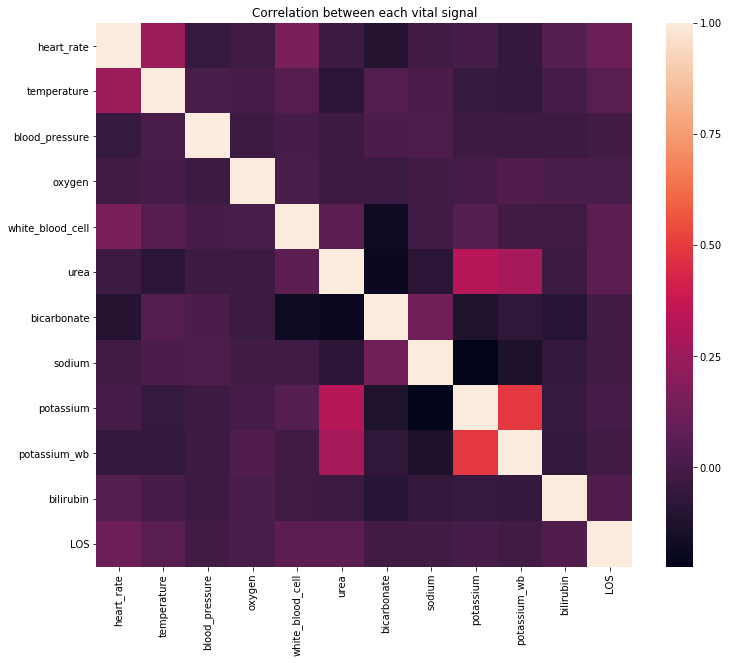

In [93]:
import seaborn as sns

# LOS data: keep only EXPIRE=0
adm_a = admission[admission['HOSPITAL_EXPIRE_FLAG']==0][['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']]
data_los = data.merge(adm_a, on='HADM_ID')
corr = data_los.drop(['HADM_ID', 'SUBJECT_ID', 'HOSPITAL_EXPIRE_FLAG'], axis=1).corr()
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr)
ax.set_title('Correlation between each vital signal');

In [94]:
features = data_los.columns.tolist()
data_los = data_los.dropna()
for i in range(2, len(features)-1):
#     for j in range(i+1, len(features)):
    if features[i] != 'LOS':
        plot_correlation(data_los, features[i], 'LOS')
# f1, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
# sns.scatterplot(x='heart_rate', y='LOS', data=data, alpha=0.2, ax=axs[0, 0])
# axs[0, 0].set(xlabel='Heart Rate(bpm)', ylabel='LOS')
# axs[0, 0].set_title('LOS-Heart Rate distribution')

# sns.scatterplot(x='temperature', y='LOS', data=data, alpha=0.2, ax=axs[0, 1])
# axs[0, 1].set(xlabel='Temperature(Celcius)', ylabel='LOS')
# axs[0, 1].set_title('LOS-Temperature distribution')

# sns.scatterplot(x='blood_pressure', y='LOS', data=data, alpha=0.2, ax=axs[1, 0])
# axs[1, 0].set(xlabel='blood_pressure(??)', ylabel='LOS')
# axs[1, 0].set_title('LOS-blood_pressure distribution')

# sns.scatterplot(x='oxygen', y='LOS', data=data, alpha=0.2, ax=axs[1, 1])
# axs[1, 1].set(xlabel='Oxygen(??)', ylabel='LOS')
# axs[1, 1].set_title('LOS-Oxygen distribution')

# sns.scatterplot(x='white_blood_cell', y='LOS', data=data, alpha=0.2, ax=axs[2, 0])
# axs[2, 0].set(xlabel='White Blood Cell Count(???)', ylabel='LOS')
# axs[2, 0].set_title('LOS-White Blood Cell Count distribution')

# sns.scatterplot(x='urea', y='LOS', data=data, alpha=0.2, ax=axs[2, 1])
# axs[2, 1].set(xlabel='Urea(??)', ylabel='LOS')
# axs[2, 1].set_title('LOS-Urea distribution')

# sns.scatterplot(x='bicarbonate', y='LOS', data=data, alpha=0.2, ax=axs[3, 0])
# axs[3, 0].set(xlabel='Bicarbonate(??)', ylabel='LOS')
# axs[3, 0].set_title('LOS-Bicarbonate distribution')

# sns.scatterplot(x='sodium', y='LOS', data=data, alpha=0.2, ax=axs[3, 1])
# axs[3, 1].set(xlabel='Sodium(??)', ylabel='LOS')
# axs[3, 1].set_title('LOS-Sodium distribution')

# sns.scatterplot(x='potassium', y='LOS', data=data, alpha=0.2, ax=axs[4, 0])
# axs[4, 0].set(xlabel='Potassium(??)', ylabel='LOS')
# axs[4, 0].set_title('LOS-Potassium distribution')

# sns.scatterplot(x='potassium_wb', y='LOS', data=data, alpha=0.2, ax=axs[4, 1])
# axs[4, 1].set(xlabel='Potassium Whole Blood(???)', ylabel='LOS')
# axs[4, 1].set_title('LOS-Potassium Whole Blood Count distribution')

# sns.scatterplot(x='bilirubin', y='LOS', data=data, alpha=0.2, ax=axs[5, 0])
# axs[5, 0].set(xlabel='Bilirubin(??)', ylabel='LOS')
# axs[5, 0].set_title('LOS-Bilirubin distribution')

# ax9 = sns.scatterplot(x='potassium', y='LOS', data=data, alpha=0.2)
# ax9.set(xlabel='Potassium(??)', ylabel='LOS')
# ax9.set_title('LOS-Potassium distribution')

# plt.show();

# Vital Signs - Mortality Correlation

In [99]:
data_m = data.merge(admission[['HADM_ID', 'HOSPITAL_EXPIRE_FLAG']], on='HADM_ID')
features = data_m.columns.tolist()
data_m = data_m.dropna()

for i in range(2, len(features)-1):
#     for j in range(i+1, len(features)):
    if features[i] != 'HOSPITAL_EXPIRE_FLAG':
        plot_correlation(data_m, features[i], 'HOSPITAL_EXPIRE_FLAG')

GridBox(id='1039', ...)

HADM_ID
100001    [2, 5, 9, 8, 17, 2, 8, 6, 2, 6, 9, 2, 5, 2, 11...
100003                        [8, 3, 11, 8, 6, 8, 6, 8, 15]
100006                       [7, 7, 7, 1, 2, 15, 4, 17, 17]
100007                                     [8, 8, 16, 7, 6]
100009    [6, 16, 6, 2, 2, 17, 6, 6, 17, 17, 3, 6, 2, 6,...
                                ...                        
199993                          [6, 6, 6, 6, 7, 6, 2, 7, 7]
199994                          [7, 6, 7, 6, 7, 6, 9, 6, 2]
199995                     [6, 13, 6, 4, 6, 6, 17, 6, 4, 4]
199998    [6, 16, 16, 6, 15, 6, 17, 17, 6, 6, 6, 6, 2, 7...
199999         [7, 7, 7, 9, 2, 15, 15, 6, 17, 15, 3, 17, 6]
Name: category, Length: 58976, dtype: object